<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_samples/blob/master/iris_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

In [3]:
iris=load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [6]:
iris_target_data=pd.DataFrame(iris.target,columns=['Species'])
X_train,X_test,Y_train,Y_test=train_test_split(iris_df,iris_target_data)

In [7]:
print(iris_target_data)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [8]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [9]:
Y_pred=knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.9736842105263158


In [11]:
accuracy_list=[]
sns.set()
k_range=range(1,100)
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  Y_pred=knn.predict(X_test)
  accuracy_list.append(metrics.accuracy_score(Y_test,Y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

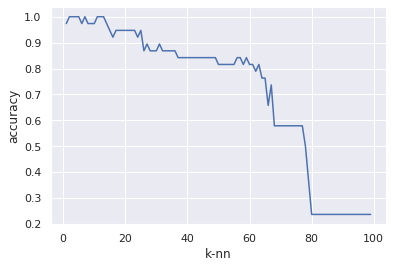

In [12]:
figure=plt.figure()
ax=figure.add_subplot(111)
ax.plot(k_range,accuracy_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('accuracy')
plt.show()